<a href="https://colab.research.google.com/github/keeratkaurbhatia/Wallet-Hunt-Classical-vs-Quantum-DSA-Mini-Project-/blob/main/DSA_Mini_Project_with_a_Quantum_Twist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Case of the Missing Wallet: A Classical vs. Quantum Investigation**
  # *A 3<sup>rd</sup> Semester Data Structures and Algorithm (BIT 201) Mini Project*
  # *Efforts by- Keerat Kaur, 23401172024, CSEAI(3)*

The Scene: It's the end of the day, and you've lost your wallet. You know it's in one of the 9 classrooms on the 3rd floor, but you don't know which one. You're at the stairs (Room 0) and the wallet is in the last room (Room 8).


**The Grid (3rd Floor):**

In [ ]:
[0]--[1]--[2]
 |    |    |
[3]--[4]--[5]
 |    |    |
[6]--[7]--[8]  <- WALLET

# **The Investigation:**

We will dispatch two types of detectives to find the wallet:


**The Classical Detectives (C++):**

  * Detective "Rando": Will wander randomly from room to room.

  * Detective "Spock" (BFS): Will search layer by layer, guaranteeing the shortest path.

  * Detective "Maze" (DFS): Will search one path to its end before backtracking.

 * Detective "Strange" (Grover's): Will use quantum superposition  to find the wallet in a way that isn't humanly possible.


*Let's see who finds it fastest and why.*

# **The Good Ol' Classical**

In [ ]:
%%writefile classical_searches.cpp

#include <iostream>
#include <vector>
#include <map>
#include <string>
#include <random> // For mt19937
#include <ctime>   // For seeding
#include <queue>   // For BFS
#include <stack>   // For DFS
#include <set>     // For visited tracking

// The Grid and Constants
const int WALLET_LOCATION = 8;
const int START_LOCATION = 0;

// Graph as an adjacency list (undirected)
std::map<int, std::vector<int>> createGrid() {
    std::map<int, std::vector<int>> grid;
    grid[0] = {1, 3};
    grid[1] = {0, 2, 4};
    grid[2] = {1, 5};
    grid[3] = {0, 4, 6};
    grid[4] = {1, 3, 5, 7};
    grid[5] = {2, 4, 8};
    grid[6] = {3, 7};
    grid[7] = {4, 6, 8};
    grid[8] = {5, 7};
    return grid;
}

// 1. Detective Rando
void randomWalk(const std::map<int, std::vector<int>>& graph) {
    static std::mt19937 gen(std::random_device{}()); // Random number generation
    int current_location = START_LOCATION;
    int steps = 0;
    const int max_steps = 10000; // Safety break, as it can spiral way worse

    while (current_location != WALLET_LOCATION && steps < max_steps) { // Until the location is found, keep wandering!
        steps++;
        const std::vector<int>& neighbors = graph.at(current_location); // Checks neighbours at that place
        std::uniform_int_distribution<> distr(0, neighbors.size() - 1); // Randomly chooses a neighbor. Like if there are 3 neighbours, it will label it as 0, 1 and 2 and then pick whatever corresponds to it
        current_location = neighbors[distr(gen)]; // Location updated to the random neighbour
    }
    std::cout << steps; // Output the number of steps
}

// 2. Detective Spock (BFS)
void bfs(const std::map<int, std::vector<int>>& graph) {
    std::queue<std::pair<int, int>> q; // A queue, FIFO principle. First part is the current node, second corresponds to steps taken until that point.
    std::set<int> visited; // Set to mark the rooms which got visited
    q.push({START_LOCATION, 0});
    visited.insert(START_LOCATION);

    while (!q.empty()) { // Explore as long as nodes available
        std::pair<int, int> current = q.front();
        q.pop();
        int node = current.first;
        int steps = current.second;

        if (node == WALLET_LOCATION) {
            std::cout << steps;
            return;
        }

        for (int neighbor : graph.at(node)) {
            if (visited.find(neighbor) == visited.end()) { // If not visited
                visited.insert(neighbor);
                q.push({neighbor, steps + 1}); // One more step "wasted"
            }
        }
    }
    std::cout << -1; // Not found
}

// 3. Detective Maze (DFS)
void dfs(const std::map<int, std::vector<int>>& graph) {
    std::stack<std::pair<int, int>> s; // Stack, since LIFO
    std::set<int> visited;
    s.push({START_LOCATION, 0});
    visited.insert(START_LOCATION);

    while (!s.empty()) {
        std::pair<int, int> current = s.top();
        s.pop();
        int node = current.first;
        int steps = current.second;

        if (node == WALLET_LOCATION) {
            std::cout << steps;
            return;
        }

        for (int neighbor : graph.at(node)) {
            if (visited.find(neighbor) == visited.end()) {
                visited.insert(neighbor);
                s.push({neighbor, steps + 1});
            }
        }
    }
    std::cout << -1; // Not found
}

// Main Function to Select Search
int main(int argc, char* argv[]) {
    if (argc != 2) { // If you enter anything except the file name and method, an error will be thrown
        std::cerr << "Usage: ./classical_search [random|bfs|dfs]" << std::endl;
        return 1;
    }

    std::string mode = argv[1]; // As from above, the second part is the method
    std::map<int, std::vector<int>> grid = createGrid(); // To define the graph

    if (mode == "random") {
        randomWalk(grid);
    } else if (mode == "bfs") {
        bfs(grid);
    } else if (mode == "dfs") {
        dfs(grid);
    } else {
        std::cerr << "Unknown mode: " << mode << std::endl;
        return 1;
    }
    return 0;
}

Writing classical_searches.cpp


In [ ]:
import subprocess
import matplotlib.pyplot as plt
import numpy as np

# Define the constant in Python for the plot title
WALLET_LOCATION = 8

# 1. Compile the C++ code
print("Compiling C++ code...")
compile_result = subprocess.run(
    ['g++', 'classical_searches.cpp', '-o', 'classical_search', '-std=c++17'],
    capture_output=True, text=True
)

if compile_result.returncode != 0:
    print("C++ compilation failed:")
    print(compile_result.stderr)
else:
    print("Compilation successful.")

    # 2. Run the simulations

    # Rando
    # Simulations required as the method is non-deterministic
    num_simulations_random = 1000
    random_steps_list = []
    print(f"Running {num_simulations_random} 'Rando' simulations...")
    for _ in range(num_simulations_random):
        result = subprocess.run(['./classical_search', 'random'], capture_output=True, text=True)
        try:
            steps = int(result.stdout.strip())
            if steps != -1:
                random_steps_list.append(steps)
        except ValueError:
            print(f"Error in 'Rando' output: {result.stdout}")

    # Deterministic methods, so only 1 run sufficient

    # Spock (BFS)
    print("Running 1 'Spock' (BFS) simulation...")
    result_bfs = subprocess.run(['./classical_search', 'bfs'], capture_output=True, text=True)
    bfs_steps = int(result_bfs.stdout.strip())

    # Maze (DFS)
    print("Running 1 'Maze' (DFS) simulation...")
    result_dfs = subprocess.run(['./classical_search', 'dfs'], capture_output=True, text=True)
    dfs_steps = int(result_dfs.stdout.strip())

    print("All classical simulations complete.")

    # 3. Store results for plotting
    if random_steps_list:
        average_random_steps = np.mean(random_steps_list)

Compiling C++ code...
Compilation successful.
Running 1000 'Rando' simulations...
Running 1 'Spock' (BFS) simulation...
Running 1 'Maze' (DFS) simulation...
All classical simulations complete.


Generating Classical Detectives' Performance Report...


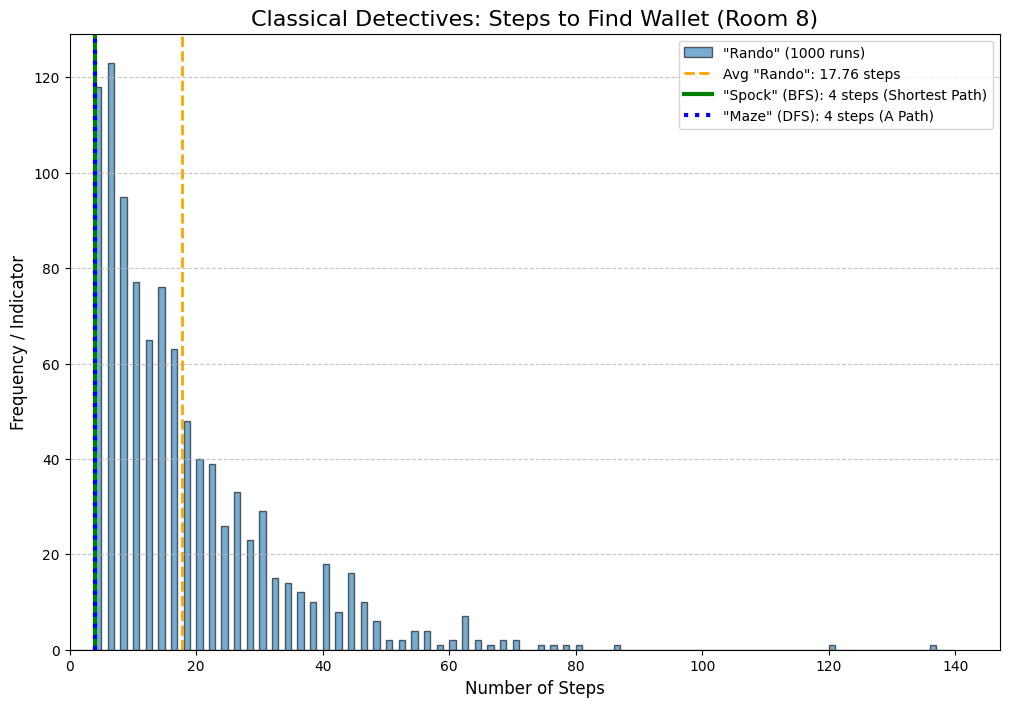

In [ ]:
# Plot 1: Performance
print("Generating Classical Detectives' Performance Report...")
plt.figure(figsize=(12, 8))

if 'average_random_steps' in locals():
    # Plot histogram for Rando
    plt.hist(random_steps_list, bins=range(0, max(random_steps_list) + 5),
             edgecolor='black', alpha=0.6, label=f'"Rando" ({num_simulations_random} runs)')
    # Plot average line for Rando
    plt.axvline(average_random_steps, color='orange', linestyle='dashed', linewidth=2,
                label=f'Avg "Rando": {average_random_steps:.2f} steps')

if 'bfs_steps' in locals() and bfs_steps != -1:
    # Plot vertical line for Spock
    plt.axvline(bfs_steps, color='green', linestyle='solid', linewidth=3,
                label=f'"Spock" (BFS): {bfs_steps} steps (Shortest Path)')
if 'dfs_steps' in locals() and dfs_steps != -1:
    # Plot vertical line for Maze
    plt.axvline(dfs_steps, color='blue', linestyle='dotted', linewidth=3,
                label=f'"Maze" (DFS): {dfs_steps} steps (A Path)')

plt.title(f'Classical Detectives: Steps to Find Wallet (Room {WALLET_LOCATION})', fontsize=16)
plt.xlabel('Number of Steps', fontsize=12)
plt.ylabel('Frequency / Indicator', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.xlim(left=0)
plt.show()


Generating Classical Detectives' Path Analysis (Footprints)...


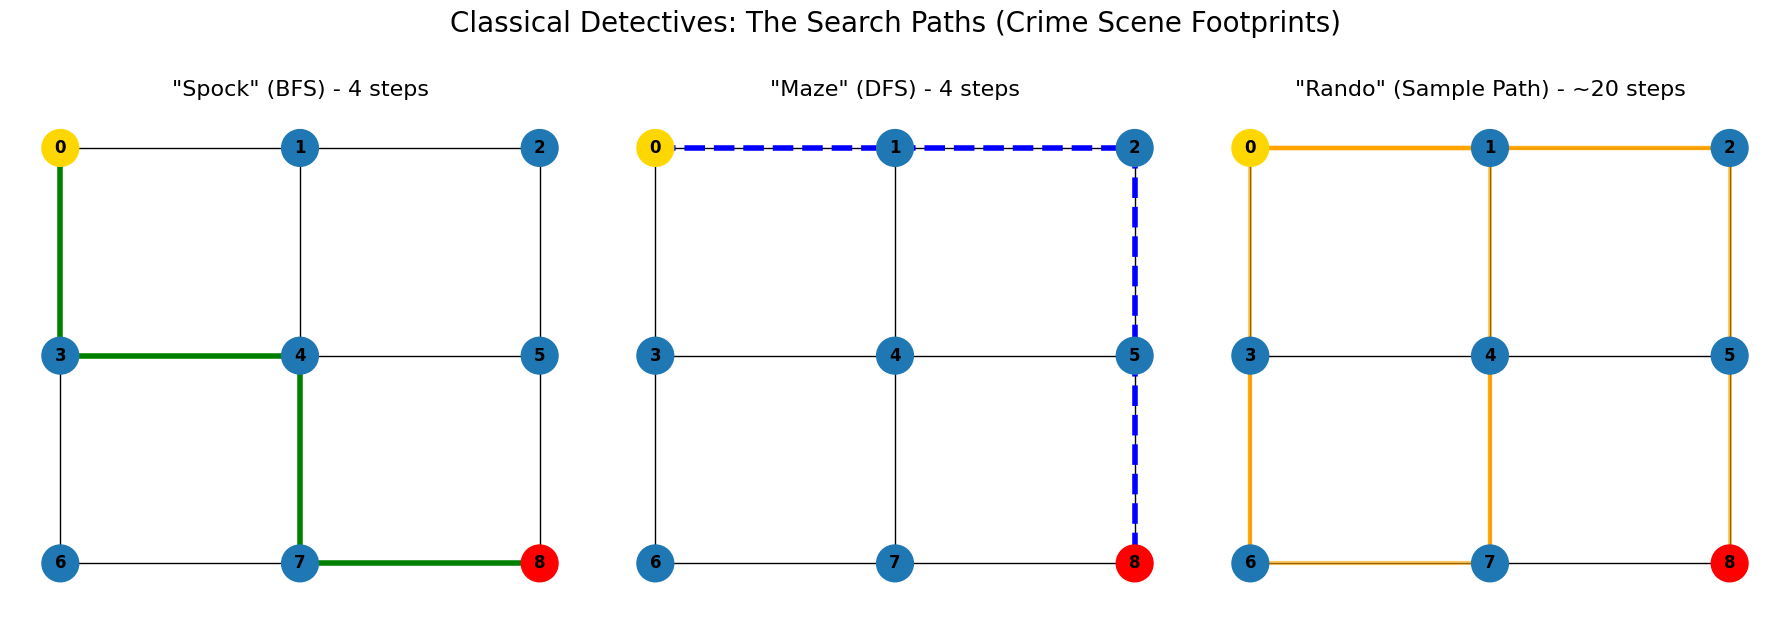

In [ ]:
# 1. Install networkx
!pip install -qq networkx
import networkx as nx
import random

# Plot 2: Path Visualization
print("\nGenerating Classical Detectives' Path Analysis (Footprints)...")

# Define the grid graph and layout
grid_graph = {
    0: [1, 3], 1: [0, 2, 4], 2: [1, 5],
    3: [0, 4, 6], 4: [1, 3, 5, 7], 5: [2, 4, 8],
    6: [3, 7], 7: [4, 6, 8], 8: [5, 7]
}
pos = {
    0: (0, 2), 1: (1, 2), 2: (2, 2),
    3: (0, 1), 4: (1, 1), 5: (2, 1),
    6: (0, 0), 7: (1, 0), 8: (2, 0)
}
G = nx.Graph(grid_graph)
node_colors = ['#1f78b4'] * G.number_of_nodes()
node_colors[0] = 'gold'  # Start
node_colors[8] = 'red'   # Wallet

# Define paths
bfs_path = [0, 3, 4, 7, 8] # A shortest path
bfs_edges = list(zip(bfs_path, bfs_path[1:]))
dfs_path = [0, 1, 2, 5, 8] # A possible DFS path
dfs_edges = list(zip(dfs_path, dfs_path[1:]))

# Generate a sample Random Walk Path
random_path = [0]
current = 0
for _ in range(int(average_random_steps)): # Use the avg steps as a guide
    if current == 8: break
    current = random.choice(grid_graph[current])
    random_path.append(current)
if random_path[-1] != 8: # Just to make it end at the wallet for the viz
    try:
        completion_path = nx.shortest_path(G, source=current, target=8)
        random_path.extend(completion_path[1:])
    except nx.NetworkXNoPath:
        pass

random_edges = list(zip(random_path, random_path[1:]))

# Plot the paths
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
plt.suptitle('Classical Detectives: The Search Paths (Crime Scene Footprints)', fontsize=20, y=1.02)

# Plot 1: "Spock" (BFS)
ax1.set_title(f'"Spock" (BFS) - {len(bfs_path)-1} steps', fontsize=16)
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=700, font_weight='bold', ax=ax1)

nx.draw_networkx_edges(G, pos, edgelist=bfs_edges, width=4, edge_color='green', ax=ax1)


# Plot 2: "Maze" (DFS)
ax2.set_title(f'"Maze" (DFS) - {len(dfs_path)-1} steps', fontsize=16)
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=700, font_weight='bold', ax=ax2)
nx.draw_networkx_edges(G, pos, edgelist=dfs_edges, width=4, edge_color='blue', style='dashed', ax=ax2)


# Plot 3: "Rando" (Random Walk)
ax3.set_title(f'"Rando" (Sample Path) - ~{len(random_path)-1} steps', fontsize=16)
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=700, font_weight='bold', ax=ax3)
nx.draw_networkx_edges(G, pos, edgelist=random_edges, width=3, edge_color='orange', alpha=0.6, ax=ax3)


plt.tight_layout()
plt.show()

# **Classical Debrief**

Our classical detectives found the wallet, but their methods varied wildly. Let's look at their case files.

# **Why BFS/DFS? This is a Graph, not a "Bag of Keys"!**

You often hear "classical search is $O(N)$." This is true for a simple unstructured list (like a "bag of keys"). If you have $N$  keys, you'll check $N/2$  on average. We call this $O(N)$.

But our 9-room floor is a graph (rooms connected by hallways). We can't just check room 1, then 2, then 3. We have to travel. This is a pathfinding problem, so we must use graph-searching algorithms.

# **The Toolkit (Data Structures)**
  * Detective "Spock" (BFS) uses a queue (First-In, First-Out).
      * ***Why?*** \
      A queue is a "waiting line." He searches Room 0, then puts its neighbors (1 and 3) in line. He must search 1 and 3 before he's allowed to search their neighbors (like 2 and 4). This forces him to search in "ripples," like dropping a stone in a pond.

    * ***Verdict:***\
    This method is guaranteed to find the shortest possible path.

  * Detective "Maze" (DFS) uses a stack (Last-In, First-Out).

    * ***Why?*** \
    A stack is a "pile of plates." He searches 0, then "stacks" 1 and 3. He takes 3 off the top. He searches 3, then "stacks" 4 and 6. He takes 6 off the top... This forces him to go as deep as possible down one path before "backtracking."

    * ***Verdict:*** \
    This method is not guaranteed to find the shortest path. He could have taken a long, 8-step path. He just got lucky.

# **The Report (Time & Space Complexities)**

Let's say we have an $N \times N$ grid. The total number of rooms to check is $K = N^2$.

* Detective "Spock" (BFS)
  * **Time:** $O(K)$ or $O(N^2)$
  * **Space:** $O(K)$ or $O(N^2)$
  * **Justification:**\
   He is systematic. In the worst case, he must visit every single room ($K$) and check every single hallway. His "brain" (the visited set and the queue) must also grow to hold all $K$ rooms. This is called linear time (linear to the total number of rooms).

* Detective "Maze" (DFS)
  * **Time:** $O(K)$ or $O(N^2)$
  * **Space:** $O(K)$ or $O(N^2)$
  * **Justification:**\
   Same as BFS. He must visit every room and hallway once. His "brain" (the visited set and the stack) also grows with the total number of rooms $K$.

* Detective "Rando" (Random Walk)
  * **Time:** $O(K \log K)$ (Average) or $O(\infty)$ (Worst)
  * **Space:** $O(1)$
  * **Justification**: \
  He's a "bumbling fool." He has no "brain" ($O(1)$ space), so he might walk back and forth forever ($O(\infty)$ worst-case). His average time is $O(K \log K)$, which is worse than the systematic detectives.
  


# Classical Verdict:
"Rando" is unreliable. "Spock" (BFS) is the best, finding the shortest path in a fast, predictable $O(K)$ time. But all classical methods are fundamentally "one room at a time."

# **The Quantum Trick**

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 101.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 111.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 60.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.8 MB/s eta 0:00:00

--- Deploying the Quantum Detective (Dr. Strange) ---
Searching for wallet in 9 rooms. Using 4 qubits.
Wallet is in Room 8, which is state |1000>
Calculating optimal 'spells' (R = π/4 * sqrt(9)): 2

--- Quantum Detective's Final Report ---


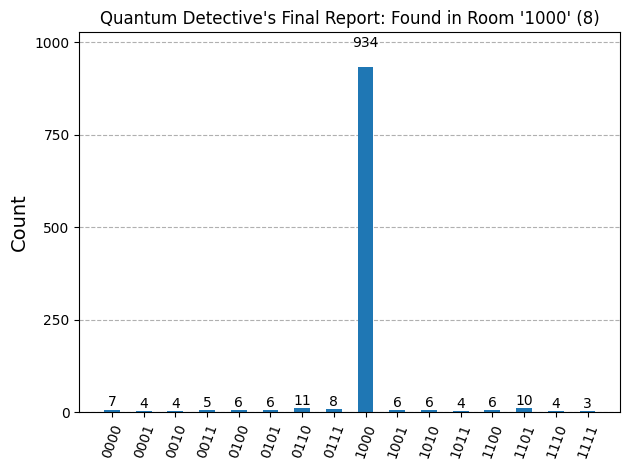

In [ ]:
# 1. Install necessary Python libraries
!pip install -qq qiskit qiskit-aer matplotlib

print("\n--- Deploying the Quantum Detective (Dr. Strange) ---")

# 2. Import libraries
import qiskit
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np

# 3. Set up the problem
K = 9 # Total number of rooms
n_qubits = int(np.ceil(np.log2(K))) # This is 4
wallet_room = 8
wallet_state_binary = format(wallet_room, f'0{n_qubits}b')

print(f"Searching for wallet in {K} rooms. Using {n_qubits} qubits.")
print(f"Wallet is in Room {wallet_room}, which is state |{wallet_state_binary}>")

# 4. Define the Oracle (The "Flip" spell)
def oracle(qc, n):
    # This "flips" the happiness of the '1000' (Room 8) clone
    qc.x([0, 1, 2]) # Flips q0, q1, q2
    qc.h(n-1)
    qc.mcx(list(range(n-1)), n-1) # Multi-controlled X
    qc.h(n-1)
    qc.x([0, 1, 2])
    qc.barrier()

# 5. Define the Diffuser (The "Catch Up / Reflect" spell)
def diffuser(qc, n):
    qc.h(range(n))
    qc.x(range(n))
    qc.h(n-1)
    qc.mcx(list(range(n-1)), n-1)
    qc.h(n-1)
    qc.x(range(n))
    qc.h(range(n))
    qc.barrier()

# 6. Build the full quantum circuit
qc = QuantumCircuit(n_qubits, n_qubits)

# Step A: Initial Superposition (Create the 9 "clones")
qc.h(range(n_qubits))
qc.barrier()

# Step B: Apply "Spells" R times
# We use the magic formula to find the optimal number of spells
num_iterations = int(np.round( (np.pi / 4) * np.sqrt(K) ))
print(f"Calculating optimal 'spells' (R = π/4 * sqrt(9)): {num_iterations}")

for _ in range(num_iterations):
    oracle(qc, n_qubits)
    diffuser(qc, n_qubits)

# Step C: Measure (Find the brightest "clone")
qc.measure(range(n_qubits), range(n_qubits))

# 7. Simulate and get results
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()
counts = result.get_counts(qc)

# 8. Visualize the quantum result
print("\n--- Quantum Detective's Final Report ---")
plot_histogram(counts, title="Quantum Detective's Final Report: Found in Room '1000' (8)")


--- Visualizing the Quantum Detective's 'Mind' ---


/tmp/ipython-input-3447768217.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax4.set_xticklabels(clone_names, rotation=45, ha='right')


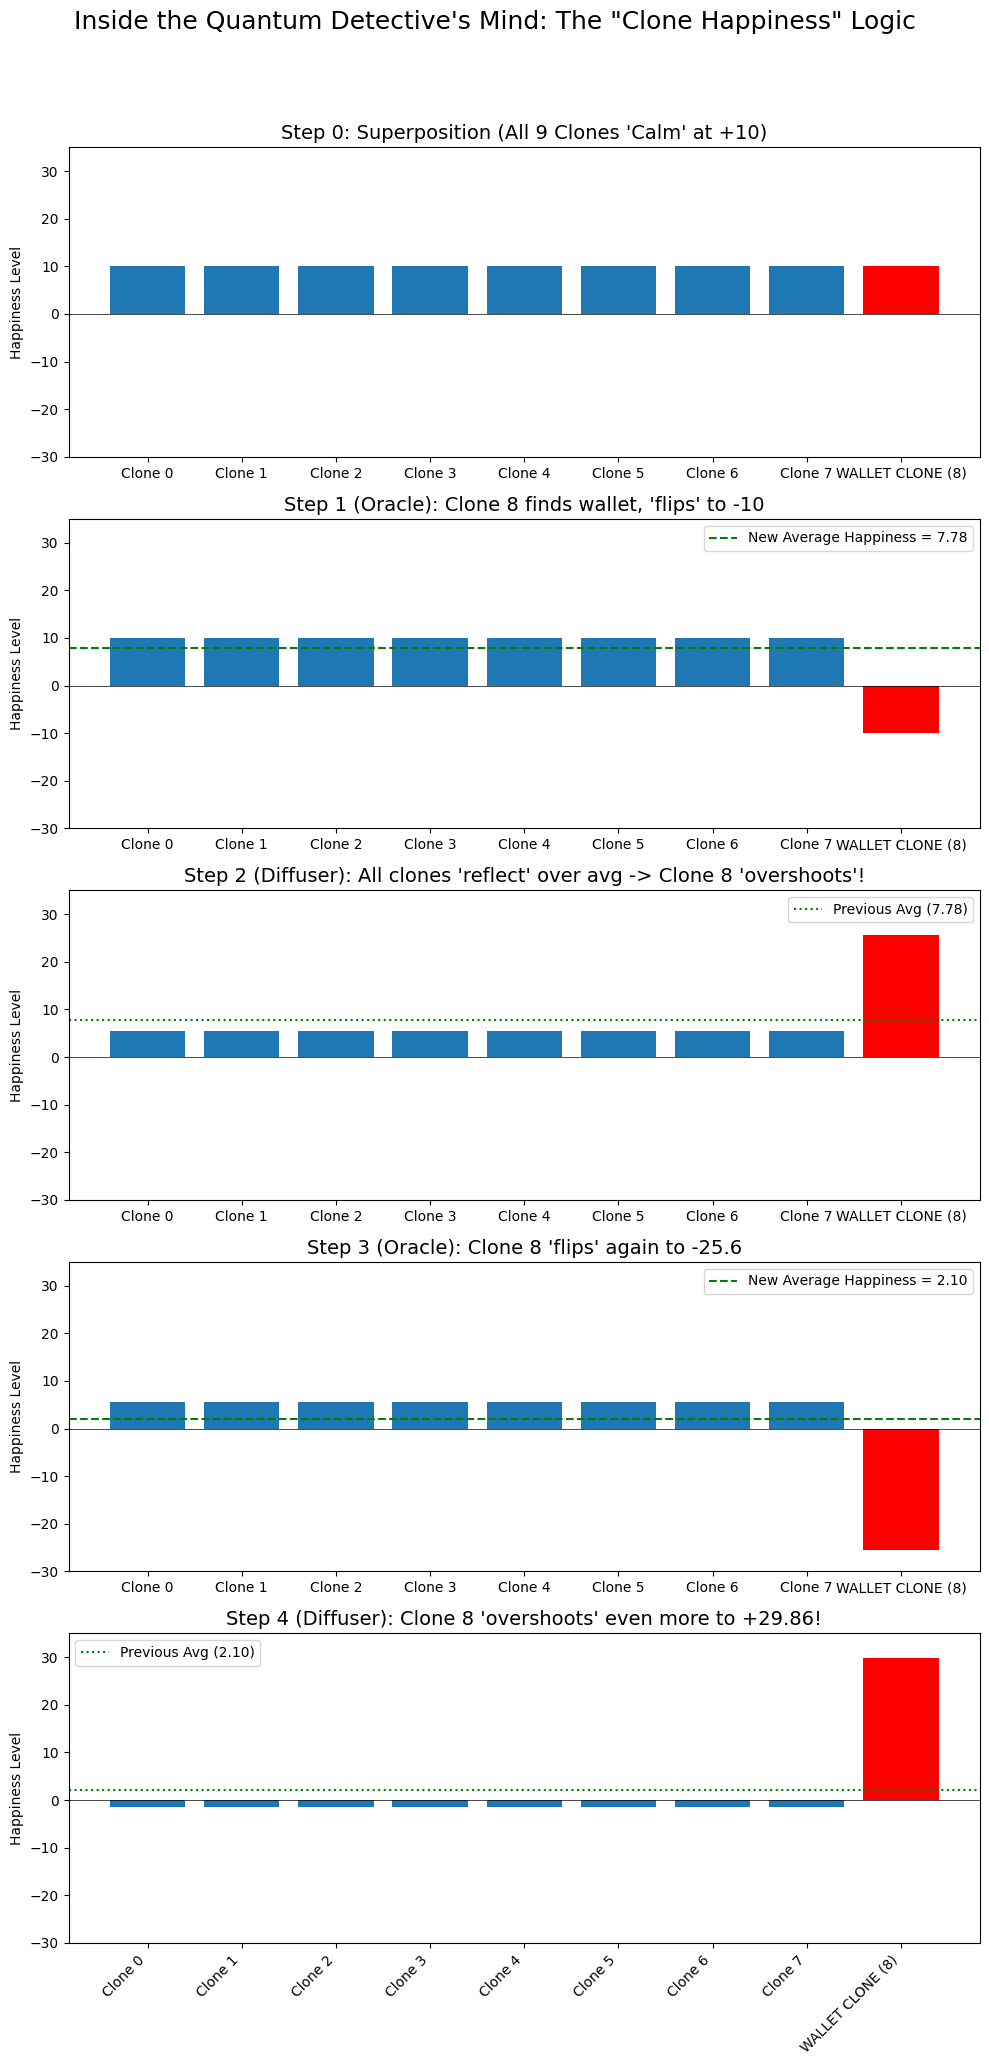

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
#INTUITIVE ONLY!!!

# Plot 1: Visualizing the "Clone Happiness" (Amplitude) Logic
print("\n--- Visualizing the Quantum Detective's 'Mind' ---")
fig_amp, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(5, 1, figsize=(10, 20))
fig_amp.suptitle('Inside the Quantum Detective\'s Mind: The "Clone Happiness" Logic', fontsize=18, y=1.03)

N = 9 # K (total rooms)
clone_names = [f"Clone {i}" for i in range(N-1)] + ["WALLET CLONE (8)"]
colors = ['#1f78b4'] * (N-1) + ['red'] # Color the "correct" clone red

# State 0: Superposition
# We use 10 just like your analogy. (The real value is 1/sqrt(N))
amp_0 = [10] * N
ax0.bar(clone_names, amp_0, color=colors)
ax0.set_title("Step 0: Superposition (All 9 Clones 'Calm' at +10)", fontsize=14)
ax0.set_ylabel("Happiness Level")
ax0.axhline(0, color='black', linewidth=0.5)
ax0.set_ylim(-30, 35)

# State 1: After Oracle 1
# The correct clone's happiness "flips"
amp_1 = [10] * (N-1) + [-10]
avg_1 = np.mean(amp_1) # This is 7.8
ax1.bar(clone_names, amp_1, color=colors)
ax1.axhline(avg_1, color='green', linestyle='--', label=f'New Average Happiness = {avg_1:.2f}')
ax1.set_title("Step 1 (Oracle): Clone 8 finds wallet, 'flips' to -10", fontsize=14)
ax1.set_ylabel("Happiness Level")
ax1.legend()
ax1.axhline(0, color='black', linewidth=0.5)
ax1.set_ylim(-30, 35)

# State 2: After Diffuser 1
# Everyone "flips" over the average
amp_2 = (2 * avg_1) - np.array(amp_1) # This gives [5.6]*8 and [25.6]
ax2.bar(clone_names, amp_2, color=colors)
ax2.axhline(avg_1, color='green', linestyle=':', label=f'Previous Avg ({avg_1:.2f})')
ax2.set_title("Step 2 (Diffuser): All clones 'reflect' over avg -> Clone 8 'overshoots'!", fontsize=14)
ax2.set_ylabel("Happiness Level")
ax2.legend()
ax2.axhline(0, color='black', linewidth=0.5)
ax2.set_ylim(-30, 35)


# State 3: After Oracle 2
# The correct clone's happiness "flips" again
amp_3 = list(amp_2)
amp_3[8] = -amp_3[8] # Flips 25.6 to -25.6
avg_2 = np.mean(amp_3) # This is 2.13
ax3.bar(clone_names, amp_3, color=colors)
ax3.axhline(avg_2, color='green', linestyle='--', label=f'New Average Happiness = {avg_2:.2f}')
ax3.set_title("Step 3 (Oracle): Clone 8 'flips' again to -25.6", fontsize=14)
ax3.set_ylabel("Happiness Level")
ax3.legend()
ax3.axhline(0, color='black', linewidth=0.5)
ax3.set_ylim(-30, 35)

# State 4: After Diffuser 2
# Everyone "flips" over the *new* average
amp_4 = (2 * avg_2) - np.array(amp_3) # This gives [-1.34]*8 and [29.86]
ax4.bar(clone_names, amp_4, color=colors)
ax4.axhline(avg_2, color='green', linestyle=':', label=f'Previous Avg ({avg_2:.2f})')
ax4.set_title("Step 4 (Diffuser): Clone 8 'overshoots' even more to +29.86!", fontsize=14)
ax4.set_ylabel("Happiness Level")
ax4.legend()
ax4.axhline(0, color='black', linewidth=0.5)
ax4.set_ylim(-30, 35)


# Add X-axis labels to the last plot
ax4.set_xticklabels(clone_names, rotation=45, ha='right')
fig_amp.tight_layout()
plt.show()


--- The Scalability Showdown: Who Wins in a GIANT Building? ---


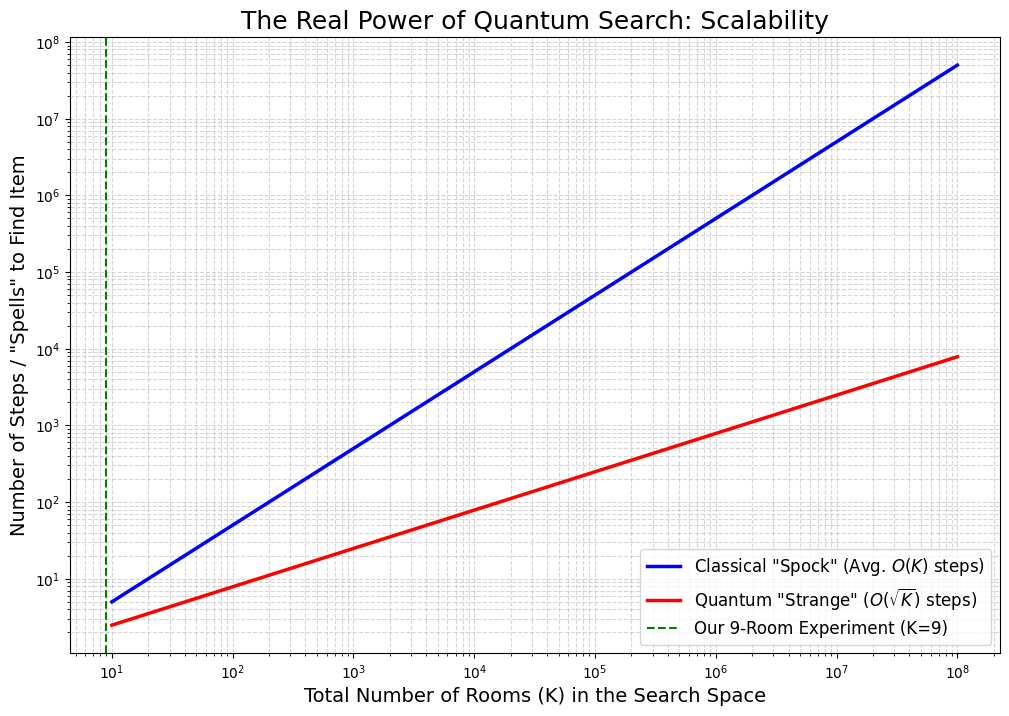

In [ ]:

# This plot explains why quantum is a big deal
print("\n--- The Scalability Showdown: Who Wins in a GIANT Building? ---")

# K = Total number of rooms
K = np.logspace(1, 8, 100) # 10 to 100 million rooms

# 1. Classical (Spock): O(K)
#    Time is proportional to the total number of rooms
#    (We use K/2 for the 'average' case of a simple list)
classical_steps = K / 2

# 2. Quantum (Strange): O(sqrt(K))
#    Time is proportional to the *square root* of the total rooms
quantum_steps = (np.pi / 4) * np.sqrt(K)

plt.figure(figsize=(12, 8))
plt.plot(K, classical_steps, label=r'Classical "Spock" (Avg. $O(K)$ steps)', color='blue', linewidth=2.5)
plt.plot(K, quantum_steps, label=r'Quantum "Strange" ($O(\sqrt{K})$ steps)', color='red', linewidth=2.5)
plt.xscale('log')
plt.yscale('log')

# Mark our tiny 9-room experiment
plt.axvline(x=9, color='green', linestyle='--', label='Our 9-Room Experiment (K=9)')
plt.title('The Real Power of Quantum Search: Scalability', fontsize=18)
plt.xlabel('Total Number of Rooms (K) in the Search Space', fontsize=14)
plt.ylabel('Number of Steps / "Spells" to Find Item', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.show()

# **Why "Clone Splitting" Wins**

This is where the case gets weird and interesting. The classical detectives were bound by physical reality: one person, one room at a time. Their best, "Spock" (BFS), had a time complexity of $O(K)$, where $K$ is the total number of rooms.



# **The Quantum "Cheat":**
The Quantum Detective ("Strange") has a "cheat code" called Superposition.This is what our "Clone" analogy represents. A human cannot create 9 copies of themselves and be in 9 places at once. It violates physics. A quantum computer can. A qubit (a quantum bit) doesn't have to be just a 0 or a 1. It can be both at the same time. By putting our 4 qubits into superposition, we create a quantum state that is, in effect, a "ghost" existing in all rooms (0000, 0001,... 1000, etc.) simultaneously.This is why it's so interesting: it's a fundamentally different way of computing that is not humanly possible. We use the "clone" analogy to visualize this parallel reality.



Detective Strange splits himself into 9 clones. Each clone carries a portion of his life force. One clone is in the correct room, the one with the wallet.

***Rule:***\
The correct clone cannot shout or signal, otherwise it would disrupt the spell. The only clue is the heartbeat of the clones.



# First Iteration – Initial Flip

The correct clone finds the wallet. Its energy flips (changes relative to the system).

Because of this flip, the system’s average energy decreases slightly.

The correct clone has to work much harder to “catch up” to this new average, while the other clones relax slightly, their energies barely change.

Result: there’s a disturbance detectable in the system, but it’s not yet obvious which clone is correct. Strange only senses something happened.


# Second Iteration – Amplification

The process repeats.

The system’s average energy, already lowered from the first iteration, drops even further.

Now, when the correct clone flips again, it has to work even harder than before to match this new average.

Meanwhile, the other clones relax even more, their energies decreasing slightly.

Result: the correct clone becomes much more excited, standing out sharply from the others.

By the end of the second iteration, the disturbance is now very visible in the system, Detective Strange can pinpoint exactly which clone (and thus which room) has the wallet.

***Detective Strange’s heartbeat-energy trick is the perfect way to explain Grover’s quantum search in human terms: the more iterations, the more the correct clone stands out.***

# The Final Verdict: $O(K)$ vs $O(\sqrt{K})$

This is the punchline.
* A classical search is $O(K)$. To search $K=1,000,000$ rooms, it takes (on average) 500,000 steps.
* The Quantum trick, or Grover's Algorithm, is $O(\sqrt{K})$.\
As our formula $R \approx \frac{\pi}{4} \sqrt{K}$ showed, for 9 rooms, we only needed 2 "iterations."

Look at the "Scalability Showdown" plot.At $K=9$, the difference between 4 steps (Classical) and 2 steps (Quantum) is tiny.

But at $K=1,000,000$:
* Classical "Spock": $\approx 500,000$ steps.
* Quantum "Strange": $\sqrt{1,000,000} \approx 1000$ "spells."

# *So What Did We Learn?*

Next time you lose your wallet, your best bet is to be systematic, like Detective "Spock" (BFS). Don't be "Detective Rando" and just wander around hoping for the best. (unless it's an unsorted array, then Rando will prove to be your *only* saviour!)

As for Detective "Strange" (Quantum)... well, you can't actually "split" yourself into 9 clones. That's a "cheat code" that only quantum computers get to use. So, no, you can't have Dr. Strange find your keys. But it means that for really, really big search problems (like scanning a database with billions of entries), the quantum "cheat" is the only one that can get the job done before the universe ends. For your 9-room floor, just stick with BFS.